# **Heart Attack Prediction Using Machine Learning Models**

**Problem Definition**

In general, heart attack occurs when the flow of blood to the heart muscle suddenly becomes
blocked. According to recent statistics from WHO, every year 17.9 million dying from the heart
attack. Several medical studies showed that the human life style is the main reason behind this
heart problem. In addition, there are many key factors which warns that the person might getting
a chance of heart attack.

In this project, we aim to implement a heart attack prediction system using
different machine learning methods, through employing a Heart Failure Prediction Dataset.
Machine learning has been shown to be operative in assisting in making decisions and predictions
from the large quantity of data made by the healthcare applications.

Dataset Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# **Import Needed Libraries**

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# **Reading Dataset**

In [391]:
heartData=pd.read_csv("/content/heart.csv")
heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [392]:
heartData.shape

(918, 12)

In [393]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [394]:
heartData.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [395]:
heartData.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


After analyzing the dataset, we identified some **unrealistic values** that need correction. Here are the key findings:  

1. **Resting Blood Pressure (`RestingBP`)**  
   - **Minimum value = `0`**, which is **not realistic** since blood pressure cannot be zero.  
   - The **average blood pressure** is **132.39**, which is within the normal range.  
   - **Maximum value = `200`**, which is high but possible.  

2. **Cholesterol (`cholesterol`)**  
   - **Minimum value = `0`**, which is **not realistic**, as the body requires some level of cholesterol.  
   - The **average cholesterol level** is **198.8**, which falls within the normal range.  
   - The **maximum value is `603`**, which is quite high but could be valid in extreme cases.  

3. **Oldpeak (`oldpeak`)**  
   - **Minimum value = `-2.6`**, which is **not expected**, as ST depression should not be negative.  
   - The **maximum value is `6.2`**, which is high but possible.  

4. **Other Variables**  
   - **Sex, Chest Pain Type, Fasting Blood Sugar, Resting ECG, Exercise Angina, and ST Slope** all appear correctly encoded and contain expected categorical values.

In [396]:
df = pd.DataFrame({'Count':heartData.shape[0],
              'Null':heartData.isnull().sum(),
              'Null %':heartData.isnull().mean() * 100,
              'Cardinality':heartData.nunique()
             })
df

,Count,Null,Null %,Cardinality
Age,918,0,0.0,50
Sex,918,0,0.0,2
ChestPainType,918,0,0.0,4
RestingBP,918,0,0.0,67
Cholesterol,918,0,0.0,222
FastingBS,918,0,0.0,2
RestingECG,918,0,0.0,3
MaxHR,918,0,0.0,119
ExerciseAngina,918,0,0.0,2
Oldpeak,918,0,0.0,53


- **No missing values** were found, indicating high data quality and readiness for analysis.
- Some variables, such as `Sex`, `FastingBS`, `ExerciseAngina`, and `HeartDisease`, have **low categorical diversity** (2-4 unique values).
- Other variables, such as `Cholesterol`, `RestingBP`, and `MaxHR`, have **a high number of unique values**, indicating they are **continuous numerical variables**.

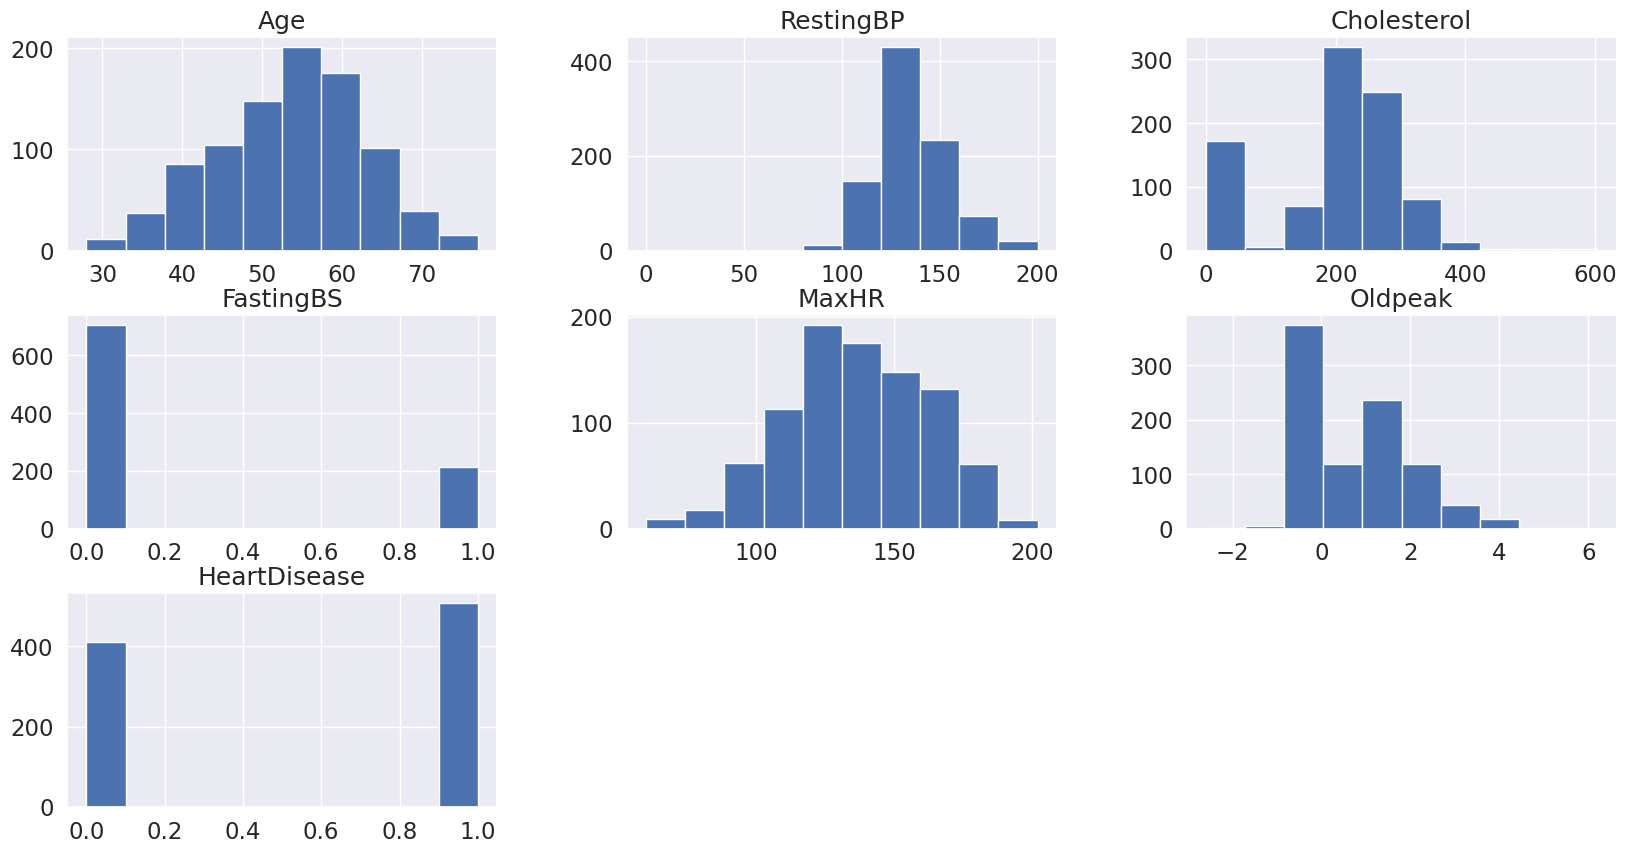

In [397]:
heartData.hist(figsize=(20, 10));

- **Age:** Normally distributed, with most patients aged between **40-60 years**.  
- **RestingBP:** Centered around **120-140 mmHg**, with some cases exceeding **180 mmHg**.  
- **Cholesterol:** **Positively skewed**; most values between **200-300 mg/dL**, with some extreme cases.  
- **FastingBS:** **Binary variable (0 or 1)**; most patients have normal fasting blood sugar (0).  
- **MaxHR:** **Normally distributed**, peaking around **100-170 bpm**.  
- **Oldpeak:** **Positively skewed**, with most values near **0**, but some high-risk cases.  
- **HeartDisease:** **Binary variable (0 or 1)**; relatively balanced distribution of patients with and without heart disease.  

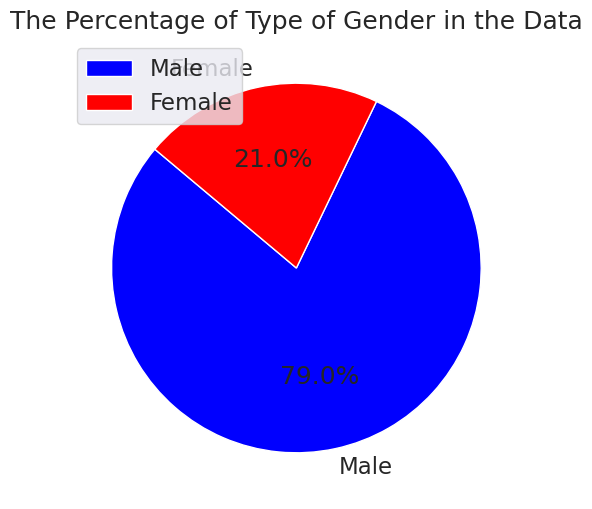

In [398]:
# Count occurrences of each gender
gender_counts = heartData['Sex'].value_counts()

# Define labels and colors
labels = ['Male', 'Female']
colors = ['blue', 'red']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("The Percentage of Type of Gender in the Data")
plt.legend(labels, loc="best")

# Show plot
plt.show()

Male patients constitute 79% of the dataset, while Female patients make up 21%.

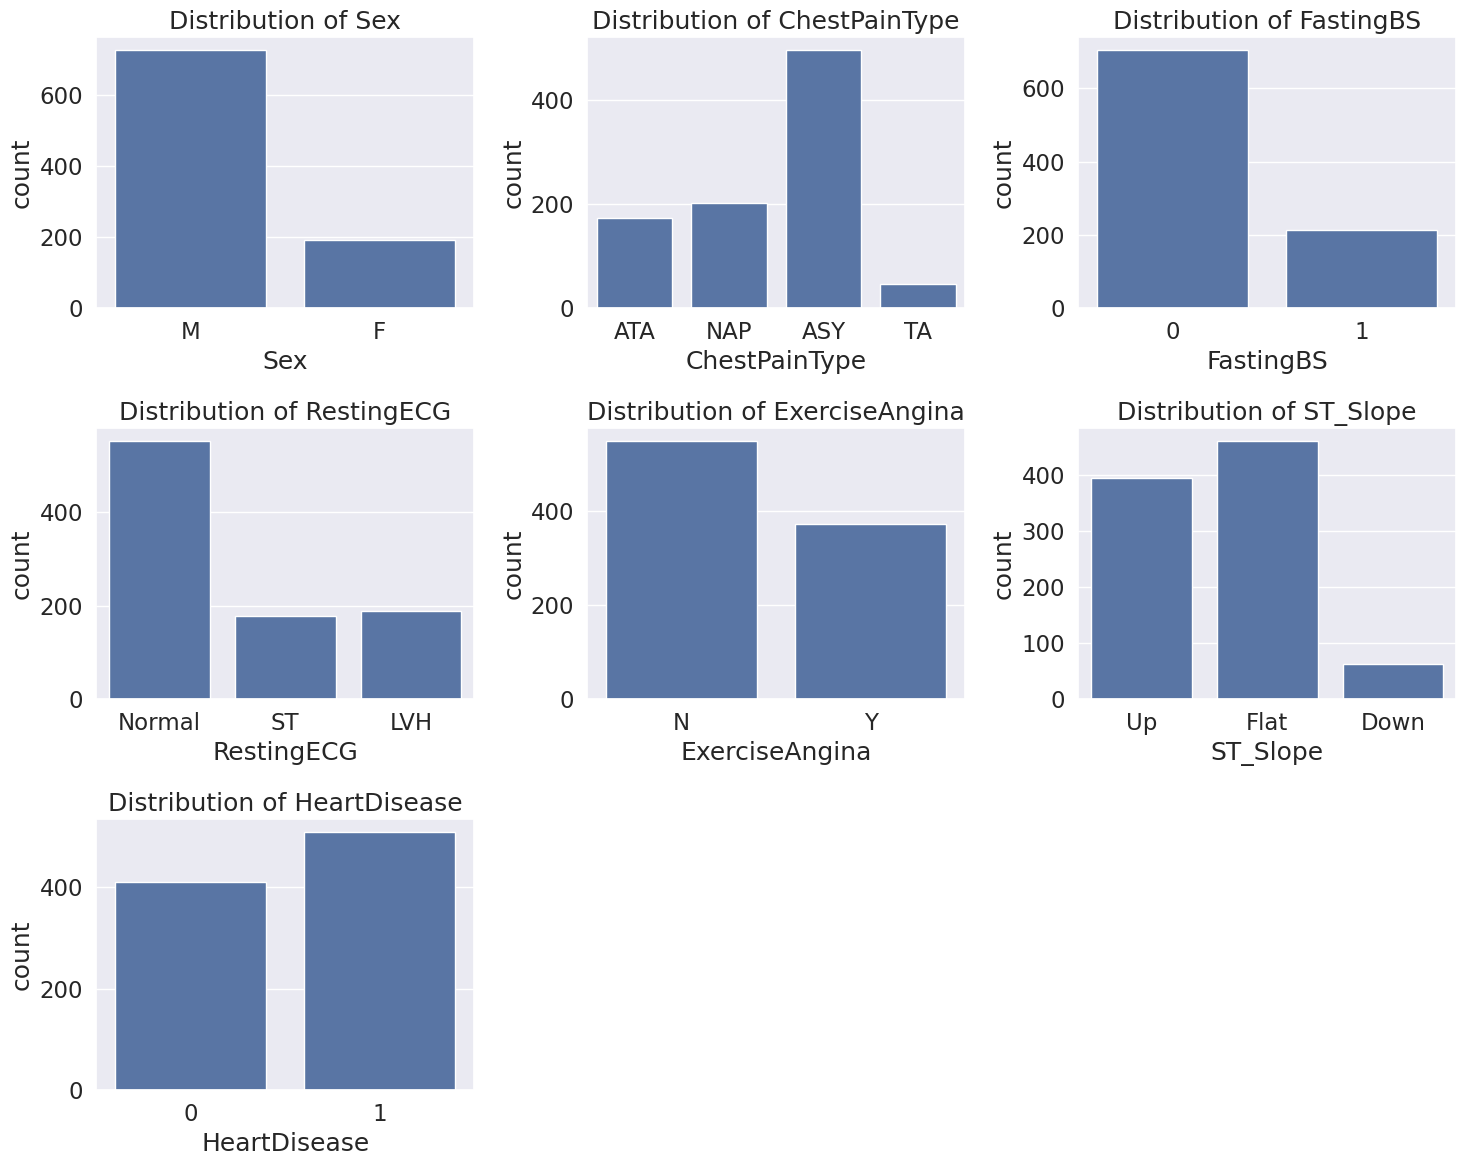

In [399]:
# Define categorical columns in the dataset
categorical_columns = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Create subplots for categorical variable distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=heartData[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots if fewer than 9 categorical variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



**Sex:**79% Male, 21% Female.

**Chest Pain Type (ChestPainType):**Most common type is "ASY" (Asymptomatic), others are less frequent.

**Fasting Blood Sugar (FastingBS):**Most patients have normal fasting blood sugar (0), fewer have high levels (1).

**Resting ECG (RestingECG):**Majority have normal ECG, some show ST abnormalities or Left Ventricular Hypertrophy (LVH).

**Exercise-Induced Angina (ExerciseAngina):**Most patients do not experience angina during exercise (N), some do (Y).

**ST Slope (ST_Slope):**"Up" and "Flat" are common, "Down" is rare and may indicate higher risk.

**Heart Disease (HeartDisease):**Fairly balanced distribution between heart disease cases (1) and non-cases (0).


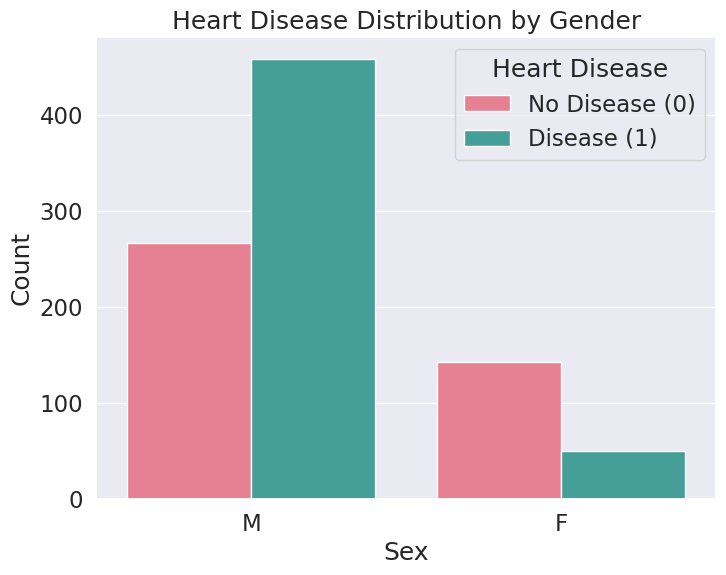

In [400]:
# Create a count plot for Heart Disease distribution by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x=heartData["Sex"], hue=heartData["HeartDisease"], palette="husl")

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Heart Disease Distribution by Gender")
plt.legend(title="Heart Disease", labels=["No Disease (0)", "Disease (1)"])
plt.show()


Heart disease appears to be more common in males than in females.

# **Data Preprocessing**

**Step 1: Rename Columns**

In [401]:
heartData.rename(columns={
    "Age": "age",
    "Sex": "sex",
    "ChestPainType": "chest pain type",
    "RestingBP": "resting bp s",
    "Cholesterol": "cholesterol",
    "FastingBS": "fasting blood sugar",
    "RestingECG": "resting ecg",
    "MaxHR": "max heart rate",
    "ExerciseAngina": "exercise angina",
    "Oldpeak": "oldpeak",
    "ST_Slope": "ST slope",
    "HeartDisease": "target"
}, inplace=True)

# Verify the changes
heartData.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Step 2: Convert Categorical Values to Numerical**

In [402]:
category_mappings = {
    "sex": {"M": 1, "F": 0},
    "chest pain type": {"ATA": 1, "NAP": 2, "ASY": 3, "TA": 4},
    "resting ecg": {"Normal": 0, "ST": 1, "LVH": 2},
    "exercise angina": {"N": 0, "Y": 1},
    "ST slope": {"Up": 1, "Flat": 2, "Down": 3}
}

for col, mapping in category_mappings.items():
   heartData[col] = heartData[col].map(mapping)

# Verify the changes
heartData.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


**Step 3: Check for Inconsistent Data**

**1.Fix unrealistic resting blood pressure values (0 is not possible)**

In [403]:
# Check for unrealistic values (e.g., blood pressure = 0)
heartData[heartData["resting bp s"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
449,55,1,2,0,0,0,0,155,0,1.5,2,1


In [404]:
# Replace '0' with the median blood pressure value to maintain consistency
median_bp = heartData[heartData["resting bp s"] > 0]["resting bp s"].median()
heartData.loc[heartData["resting bp s"] == 0, "resting bp s"] = median_bp

In [405]:
heartData[heartData["resting bp s"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


**2.Fix unrealistic cholesterol values (0 is not medically possible)**

In [406]:
zero_count = (heartData["cholesterol"] == 0).sum()
zero_count

172

In [407]:
# Replace '0' with the median cholesterol value
median_cholesterol = heartData[heartData["cholesterol"] > 0]["cholesterol"].median()
heartData.loc[heartData["cholesterol"] == 0, "cholesterol"] = median_cholesterol

In [408]:
zero_count = (heartData["cholesterol"] == 0).sum()
zero_count

0

**3. Fix negative values in 'oldpeak' (ST depression cannot be negative)**

In [409]:
heartData[heartData['oldpeak']<0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
321,63,1,3,100,237,1,0,109,0,-0.9,2,1
324,46,1,3,100,237,1,1,133,0,-2.6,2,1
325,42,1,3,105,237,1,0,128,1,-1.5,3,1
326,45,1,2,110,237,0,0,138,0,-0.1,1,0
331,56,1,3,115,237,1,1,82,0,-1.0,1,1
332,38,1,2,100,237,0,0,179,0,-1.1,1,0
334,51,1,3,130,237,1,0,170,0,-0.7,1,1
335,62,1,4,120,237,1,2,134,0,-0.8,2,1
352,56,1,3,120,237,0,1,100,1,-1.0,3,1
407,62,1,3,115,237,1,0,72,1,-0.5,2,1


In [410]:
# Replace all negative values with their absolute value
heartData["oldpeak"] = heartData["oldpeak"].abs()

In [411]:
heartData[heartData['oldpeak']<0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


**Step 4: Check for Duplicates**

In [412]:
# Count the number of duplicate rows
duplicate_count = heartData.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


**Step 5: Outlier Detection Using IQR**

In [413]:
def detect_outliers_iqr(df, columns, threshold=1.5):
    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers  # Store index of outliers

    return outlier_indices

# Select numerical columns for outlier detection
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Detect outliers
outliers_iqr = detect_outliers_iqr(heartData, numerical_columns)

# Print the number of outliers for each variable
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)}")



age: 0
resting bp s: 27
cholesterol: 41
max heart rate: 2
oldpeak: 15


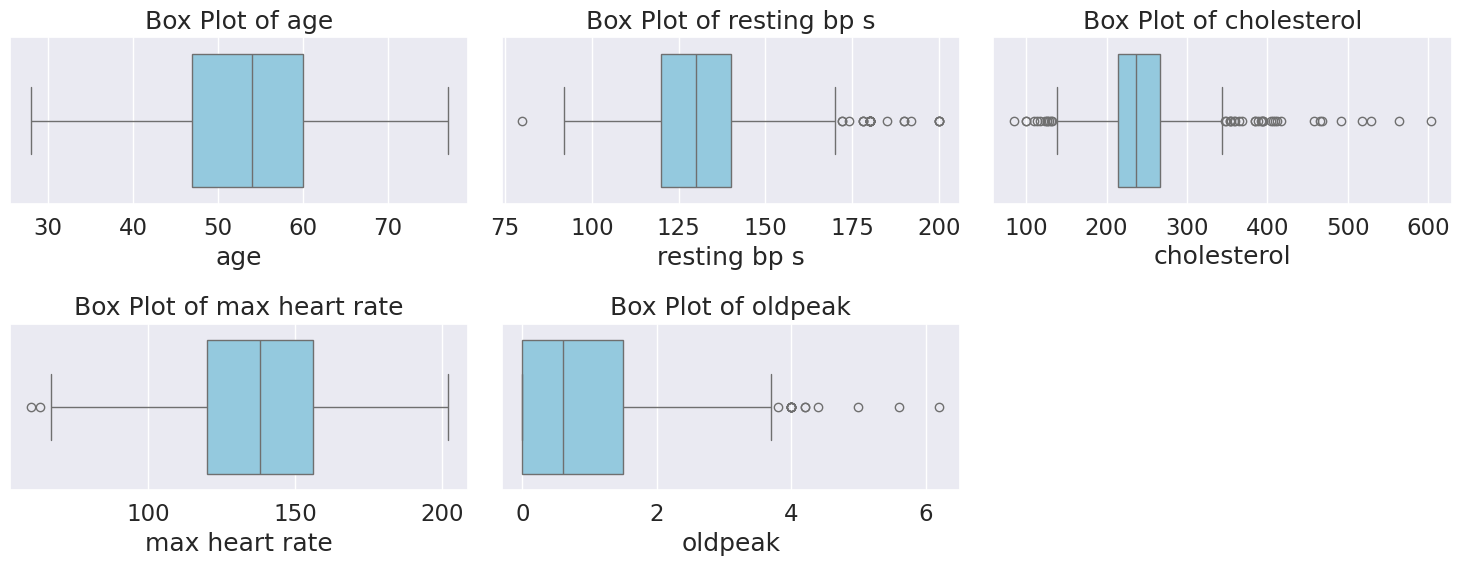

In [414]:
# Define numerical columns for outlier visualization
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Set figure size
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=heartData[col], color="skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

**Outlier Removal Using IQR (Interquartile Range)**

In [415]:
def remove_outliers(df, columns, threshold=1):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Keep only values within the normal range
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Select numerical columns for outlier removal
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Apply outlier removal
df_cleaned = remove_outliers(heartData, numerical_columns)

# Print the new shape of the cleaned dataset
print(f"Number of Rows: {df_cleaned.shape[0]}")
print(f"Number of Columns: {df_cleaned.shape[1]}")


Number of Rows: 720
Number of Columns: 12


In [416]:
# Select numerical columns for outlier detection
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Detect outliers
outliers_iqr = detect_outliers_iqr(df_cleaned , numerical_columns)

# Print the number of outliers for each variable
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)}")

age: 0
resting bp s: 0
cholesterol: 0
max heart rate: 0
oldpeak: 0


In [417]:
df_cleaned.reset_index(inplace=True, drop=True)
df_cleaned.sample(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
428,48,1,2,132,220,1,1,162,0,0.0,2,1
317,57,1,3,140,237,1,0,100,1,0.0,2,1
504,71,0,2,110,265,1,2,130,0,0.0,1,0
75,49,0,1,110,208,0,0,160,0,0.0,1,0
73,43,1,4,120,291,0,1,155,0,0.0,2,1


In [418]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  720 non-null    int64  
 1   sex                  720 non-null    int64  
 2   chest pain type      720 non-null    int64  
 3   resting bp s         720 non-null    int64  
 4   cholesterol          720 non-null    int64  
 5   fasting blood sugar  720 non-null    int64  
 6   resting ecg          720 non-null    int64  
 7   max heart rate       720 non-null    int64  
 8   exercise angina      720 non-null    int64  
 9   oldpeak              720 non-null    float64
 10  ST slope             720 non-null    int64  
 11  target               720 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 67.6 KB


In [419]:
df_cleaned.shape

(720, 12)

In [420]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
age,720.0,53.300000,8.719010,34.0,47.0,54.0,60.0,73.0
sex,720.0,0.794444,0.404388,0.0,1.0,1.0,1.0,1.0
chest pain type,720.0,2.429167,0.860497,1.0,2.0,3.0,3.0,4.0
resting bp s,720.0,130.416667,14.503129,100.0,120.0,130.0,140.0,160.0
cholesterol,720.0,237.291667,34.312779,163.0,214.0,237.0,258.0,318.0
fasting blood sugar,720.0,0.223611,0.416954,0.0,0.0,0.0,0.0,1.0
resting ecg,720.0,0.594444,0.802965,0.0,0.0,0.0,1.0,2.0
max heart rate,720.0,137.568056,23.876847,84.0,120.0,139.0,156.0,192.0
exercise angina,720.0,0.388889,0.487837,0.0,0.0,0.0,1.0,1.0
oldpeak,720.0,0.815556,0.901757,0.0,0.0,0.5,1.5,3.0


### **Now the data is ready for machine learning models.**

In [421]:
df_cleaned.to_csv("processed_data.csv", index=False)

In [422]:
df_cleaned = pd.read_csv("/content/processed_data.csv")
df_cleaned.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


# **Exploratory Data Analysis (EDA)**

**Age Distribution by Heart Disease**

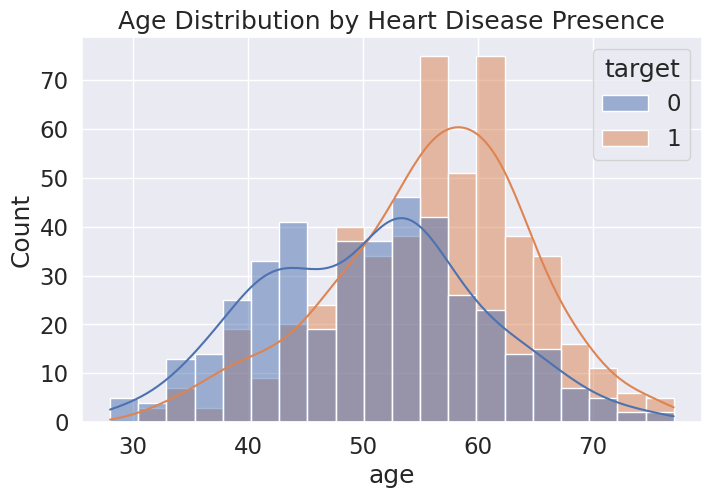

In [423]:
plt.figure(figsize=(8, 5))
sns.histplot(data=heartData, x="age", hue="target", kde=True, bins=20)
plt.title("Age Distribution by Heart Disease Presence")
plt.show()

**Distribution of Heart Disease by Age**


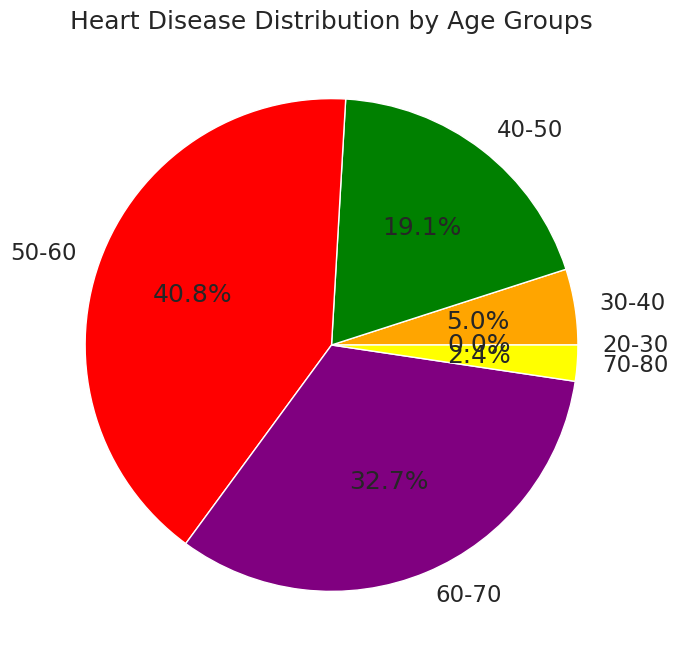

In [424]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=False)

# Count the number of people with heart disease in each age group
age_disease_distribution = df_cleaned.groupby('age_group')['target'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_disease_distribution, labels=age_disease_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple', 'yellow'])
plt.title("Heart Disease Distribution by Age Groups")
plt.show()



**Overall Proportion of Heart Disease Cases**

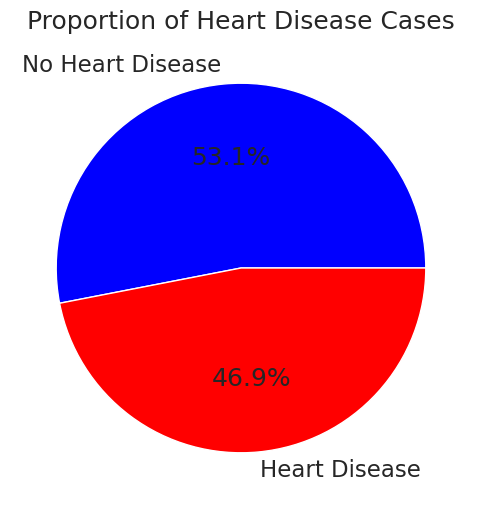

In [425]:
# Count the number of people with and without heart disease
heart_disease_counts = df_cleaned['target'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Proportion of Heart Disease Cases")
plt.show()


**Distribution of Chest Pain Types Among Heart Disease Patients**

chest pain type
3    292
2     56
1     19
4     15
Name: count, dtype: int64


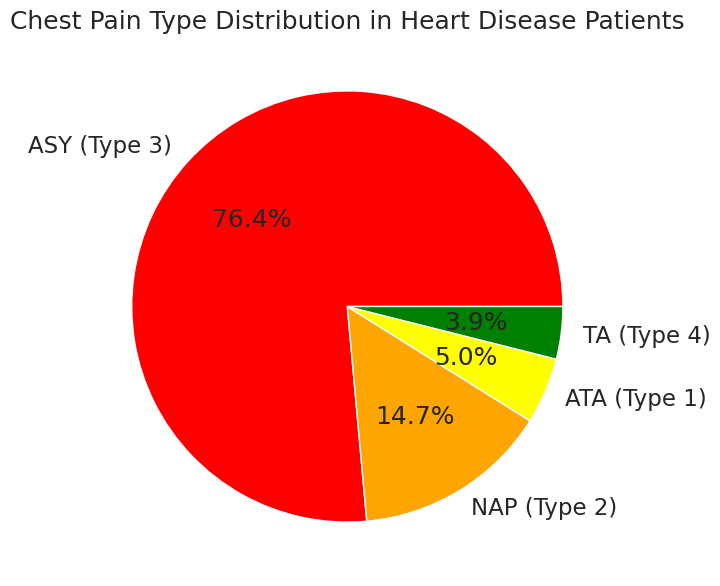

In [426]:
reverse_mapping = {1: "ATA", 2: "NAP", 3: "ASY", 4: "TA"}
chest_pain_distribution = df_cleaned[df_cleaned['target'] == 1]['chest pain type'].value_counts()


print(chest_pain_distribution)


plt.figure(figsize=(7, 7))
plt.pie(chest_pain_distribution,
        labels=[f"{reverse_mapping[label]} (Type {label})" for label in chest_pain_distribution.index],
        autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green'])
plt.title("Chest Pain Type Distribution in Heart Disease Patients")
plt.show()


**Distribution of Fasting Blood Sugar Levels**

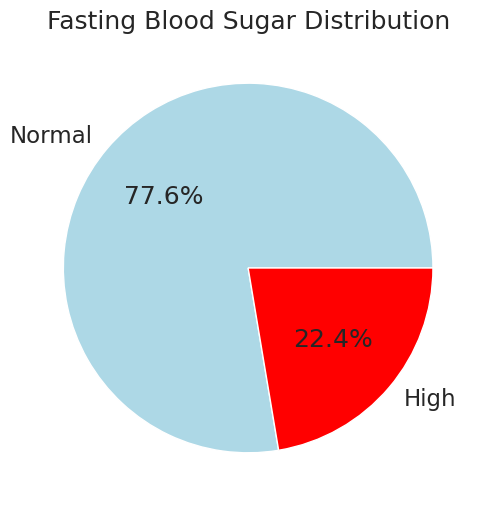

In [427]:
# Count cases based on fasting blood sugar (1 = high, 0 = normal)
fbs_distribution = df_cleaned['fasting blood sugar'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fbs_distribution, labels=['Normal', 'High'], autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title("Fasting Blood Sugar Distribution")
plt.show()


**Proportion of Patients with Exercise-Induced Angina**

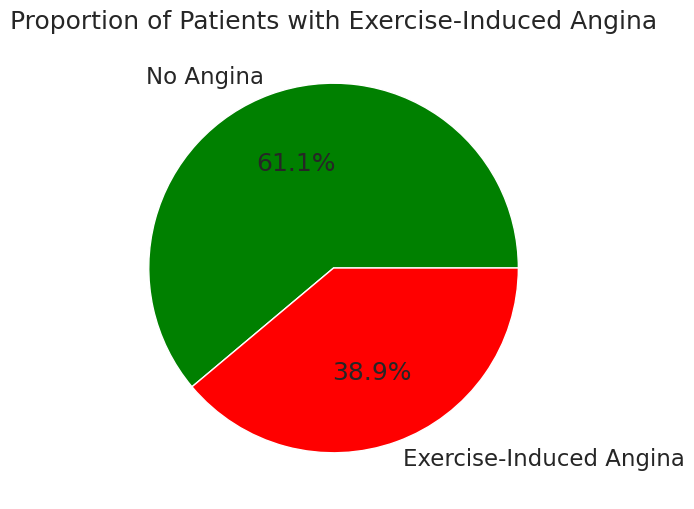

In [428]:
# Count exercise angina cases
angina_distribution = df_cleaned['exercise angina'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(angina_distribution, labels=['No Angina', 'Exercise-Induced Angina'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Proportion of Patients with Exercise-Induced Angina")
plt.show()


**Distribution of ST Slope Types Among Heart Disease Patients**

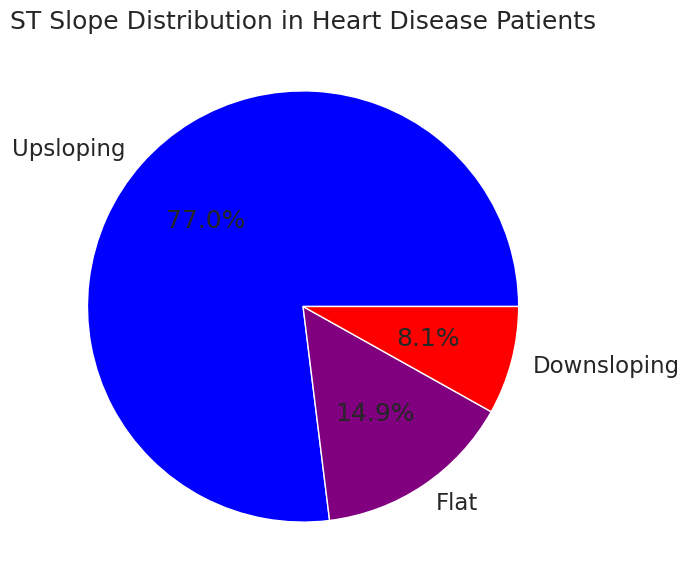

In [429]:
# Count cases of ST slope types among patients with heart disease
st_slope_distribution = df_cleaned[df_cleaned['target'] == 1]['ST slope'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(st_slope_distribution, labels=['Upsloping', 'Flat', 'Downsloping'], autopct='%1.1f%%', colors=['blue', 'purple', 'red'])
plt.title("ST Slope Distribution in Heart Disease Patients")
plt.show()


**Chest Pain Type & Heart Disease**

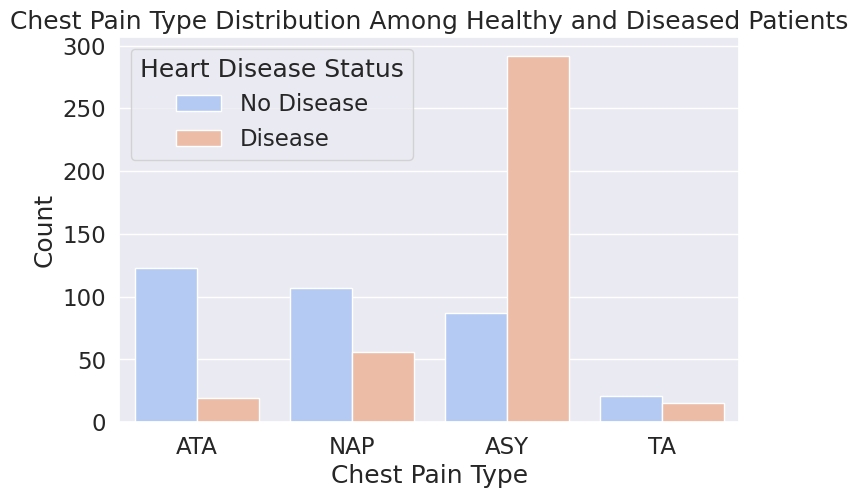

In [430]:
chest_pain_mapping = {1: "ATA", 2: "NAP", 3: "ASY", 4: "TA"}
df_cleaned['chest pain type'] = df_cleaned['chest pain type'].replace(chest_pain_mapping)


target_mapping = {0: "No Disease", 1: "Disease"}
df_cleaned['target'] = df_cleaned['target'].replace(target_mapping)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="chest pain type", hue="target", palette="coolwarm")


plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Chest Pain Type Distribution Among Healthy and Diseased Patients")
plt.legend(title="Heart Disease Status")
plt.show()



**Exercise-Induced Angina & Heart Disease**

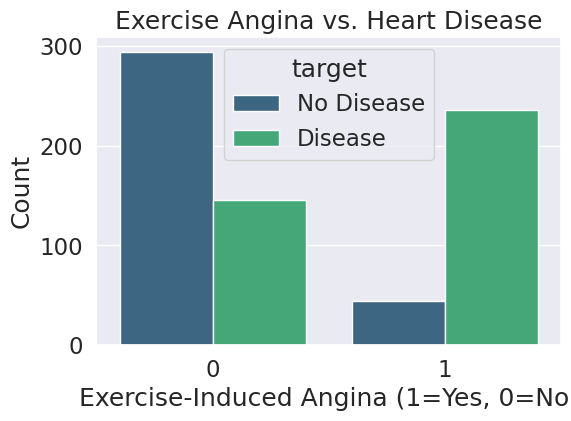

In [431]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x="exercise angina", hue="target", palette="viridis")
plt.xlabel("Exercise-Induced Angina (1=Yes, 0=No)")
plt.ylabel("Count")
plt.title("Exercise Angina vs. Heart Disease")
plt.show()


**Correlation Matrix (Feature Importance)**

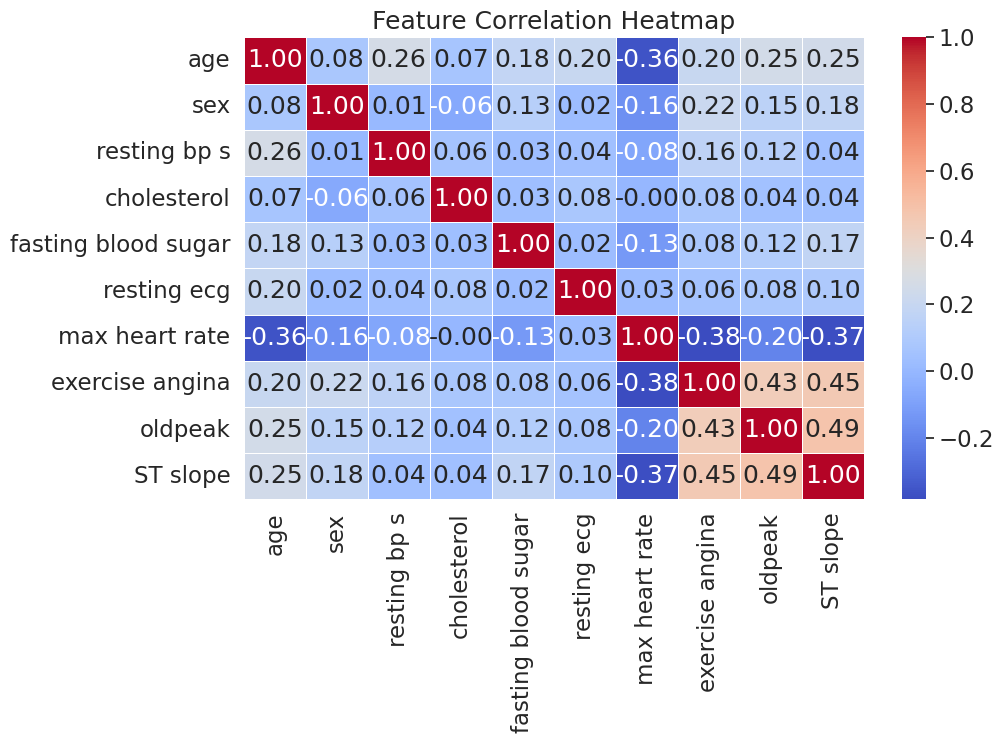

In [432]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.select_dtypes(include=np.number).corr(),annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


**Comparing Max Heart Rate with Heart Disease**

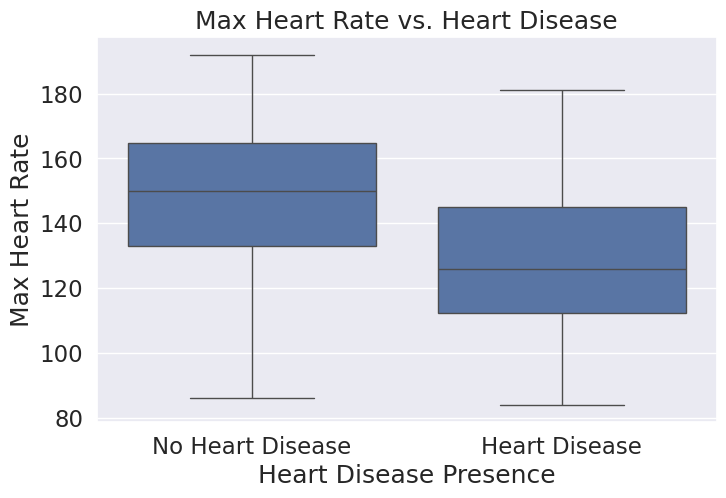

In [433]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['target'], y=df_cleaned['max heart rate'])
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel("Heart Disease Presence")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate vs. Heart Disease")
plt.show()


Patients with heart disease cannot reach a high maximum heart rate during exercise, compared to healthy people.

# **Machine Learning Models**

In [434]:
df_cleaned = pd.read_csv("/content/processed_data.csv")
df_cleaned.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


In [435]:
feature_cols = df_cleaned[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate','exercise angina', 'oldpeak', 'ST slope']]
feature_cols.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,1,140,289,0,0,172,0,0.0,1
1,49,0,2,160,180,0,0,156,0,1.0,2
2,37,1,1,130,283,0,1,98,0,0.0,1
3,48,0,3,138,214,0,0,108,1,1.5,2
4,54,1,2,150,195,0,0,122,0,0.0,1


In [436]:
outcome_col = df_cleaned['target']
outcome_col.head()

,target
0,0
1,1
2,0
3,1
4,0


In [437]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split( feature_cols, outcome_col, test_size=0.3, random_state=42)

# CatBoost Algorithm for Classification

In [438]:
%pip install catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

model.fit(
    x_train_all, y_train_all,
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

# Prediction
y_pred = model.predict(x_test)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy: 0.85
Precision: 0.82
Recall: 0.90
F1 Score: 0.86


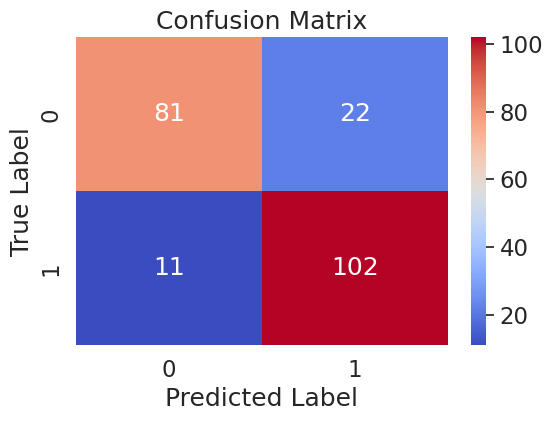

In [439]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Gradient Boosting Algorithm for Classification

In [440]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

# Fit the model (Train the model)
model.fit(x_train_all, y_train_all)
# Perform prediction
y_pred = model.predict(x_test)


Accuracy: 85.65%
Precision: 0.83
Recall: 0.91
F1 Score: 0.87


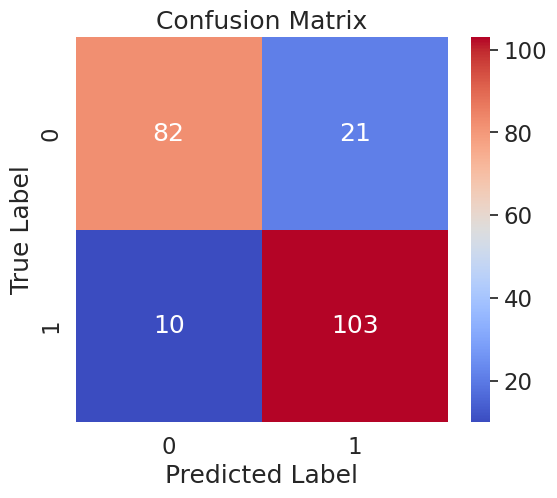

In [441]:
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#  K-Nearest Neighbors (KNN) Algorithm for Classification

Max train score 100.0 % and k = [1]
Max test score 70.83333333333334 % and k = [12]
Accuracy: 65.74%
Precision: 0.66
Recall: 0.70
F1 Score: 0.68


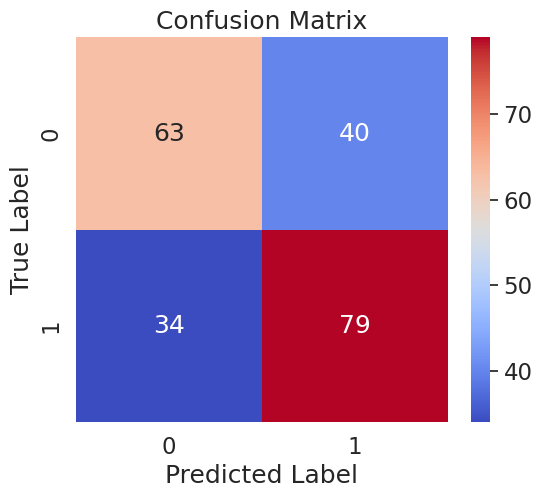

In [442]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train_all,y_train_all)

    train_scores.append(knn.score(x_train_all,y_train_all))
    test_scores.append(knn.score(x_test,y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


knn = KNeighborsClassifier(15)

knn.fit(x_train_all,y_train_all)
knn.score(x_test,y_test)

y_pred = knn.predict(x_test)




accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Logistic Regression for Classification

Accuracy: 81.48%
Precision: 0.80
Recall: 0.87
F1 Score: 0.83


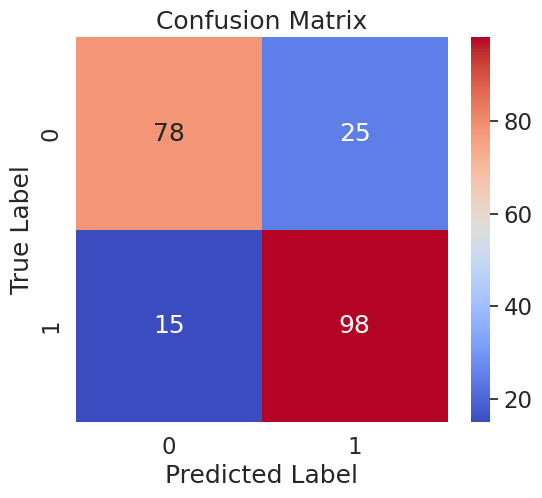

In [443]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression()
model = model.fit(x_train_all, y_train_all)
y_pred = model.predict(x_test)




accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



# Naïve Bayes Algorithm for Classification

Accuracy: 81.48%
Precision: 0.83
Recall: 0.81
F1 Score: 0.82


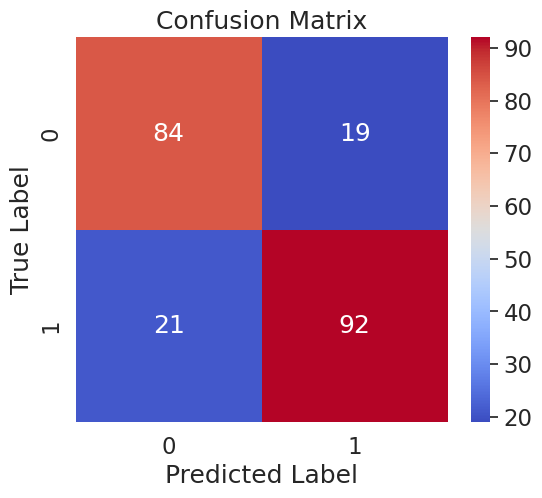

In [444]:
from sklearn.naive_bayes import GaussianNB

DT = GaussianNB()

#Train modle
DT.fit(x_train_all, y_train_all)

# Prediction
y_pred = DT.predict(x_test)




accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Random Forest Algorithm for Classification

Accuracy: 84.26%
Precision: 0.82
Recall: 0.89
F1 Score: 0.86


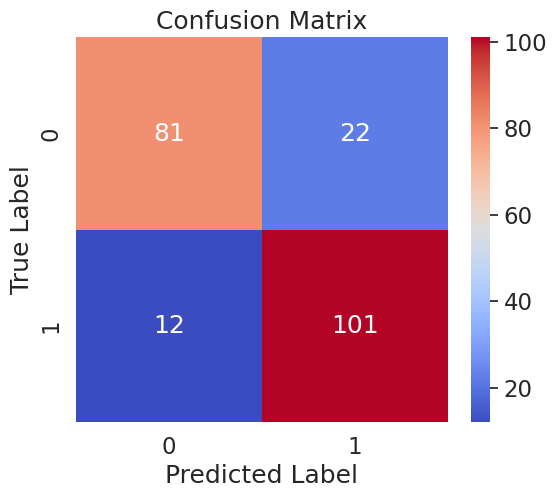

In [445]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model = RandomForestClassifier(n_estimators=50, random_state=42)


model.fit(x_train_all, y_train_all)


y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



# Support Vector Machine (SVM) Algorithm for Classification

Accuracy: 70.37%
Precision: 0.70
Recall: 0.77
F1 Score: 0.73


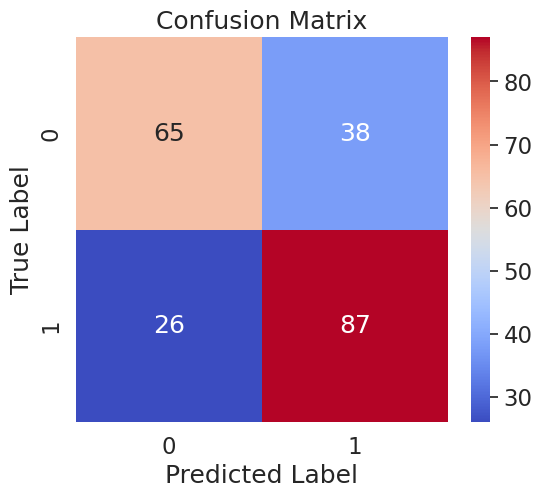

In [446]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


model.fit(x_train_all, y_train_all)


y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Neural Network (NN) Model for Classification

In [447]:
def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")


def predict_model(model):
    print("The Predicted Results:")
    Y_pred = model.predict_classes(X_test_d)
    fp,tp,thresholds = metrics.roc_curve(y_test,Y_pred)
    cm = metrics.confusion_matrix(y_test,Y_pred)
    print("The Resulted Score:", metrics.auc(fp,tp))
    print("Classification report:")
    print(metrics.classification_report(y_test,Y_pred))
    print("Confusion Matrix:")
    print(cm)
    print("___________________________________________________")
    prec, rec, _ = metrics.precision_recall_curve(y_test, Y_pred)
    roc_auc = metrics.auc(fp, tp)
    plt.figure(figsize=(8, 3))
    plt.subplot(1,2,1)
    plt.plot(fp, tp, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.step(rec, prec, color='orange', where='post')
    # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.grid(True)
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.5   # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.show()


def predictmodeln(model):
    print("The Predict Model In")
    y_pred = np.argmax(model.predict(x_test), axis=-1)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("The Resulted Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)



model = Sequential()
model.add(Dense(256,activation='sigmoid',input_dim=11))
#model.add(Dense(64,activation='sigmoid', input_dim=8))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
# Compile Neural Network Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
print("The Model Summary:")
model.summary()
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")


# Train the Neural Network Model
model.fit(x_train_all,y_train_all, batch_size=50, epochs=60)
print("--------------------- END OF TRAINING-------------------------")
print("-------------------------------------------------------------------------------------------------")


# Test the Neural Network Model
print(predictmodeln(model))
print("#################################################################################################")


The Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,329 (44.25 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5622 - loss: 0.6832
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6503 - loss: 0.6367 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6478 - loss: 0.6267 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7190 - loss: 0.5832 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6488 - loss: 0.6436 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6715 - loss: 0.6146 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6801 - loss: 0.5818 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6625 - loss: 0.6112 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7154 - loss: 0.5967 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6835 - loss: 0.6105 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

# Convolutional Neural Network (CNN)

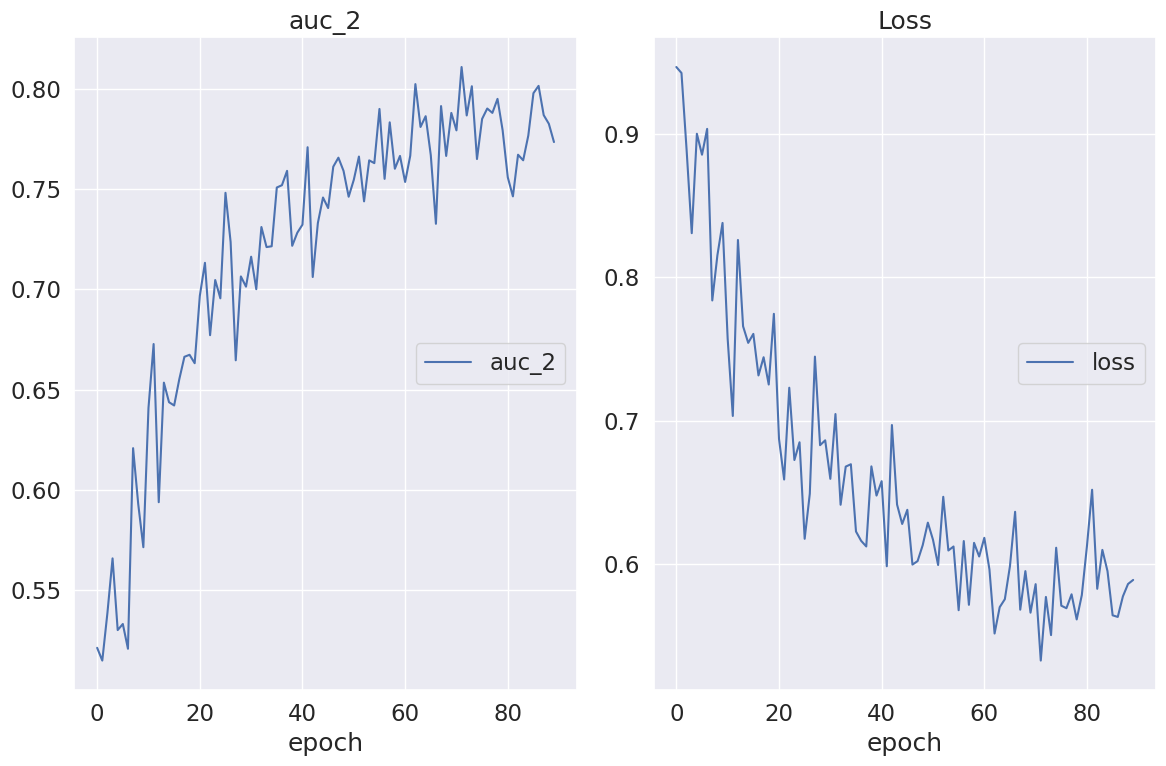

auc_2
	auc_2            	 (min:    0.515, max:    0.811, cur:    0.773)
Loss
	loss             	 (min:    0.533, max:    0.947, cur:    0.589)
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - auc_2: 0.7744 - loss: 0.5842
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc_2: 0.7994 - loss: 0.5891  
[0.5678187012672424, 0.799639105796814]
The Predicted Results:


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The Resulted Score: 0.6992009622819829
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       103
           1       0.69      0.80      0.74       113

    accuracy                           0.70       216
   macro avg       0.71      0.70      0.70       216
weighted avg       0.71      0.70      0.70       216

Confusion Matrix:
[[62 41]
 [23 90]]
___________________________________________________


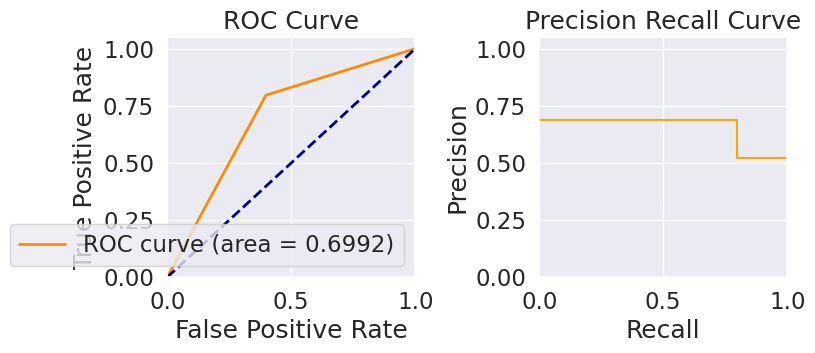

In [448]:
# CNN MODEL

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")



def predict_model(model):
    print("The Predicted Results:")
    Y_pred = model.predict_classes(X_test_d)
    fp,tp,thresholds = metrics.roc_curve(y_test,Y_pred)
    cm = metrics.confusion_matrix(y_test,Y_pred)
    print("The Resulted Score:", metrics.auc(fp,tp))
    print("Classification report:")
    print(metrics.classification_report(y_test,Y_pred))
    print("Confusion Matrix:")
    print(cm)
    print("___________________________________________________")
    prec, rec, _ = metrics.precision_recall_curve(y_test, Y_pred)
    roc_auc = metrics.auc(fp, tp)
    plt.figure(figsize=(8, 3))
    plt.subplot(1,2,1)
    plt.plot(fp, tp, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.step(rec, prec, color='orange', where='post')
    # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.grid(True)
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.5   # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.show()


def predict_model(model):
    print("The Predicted Results:")
    Y_pred = (model.predict(X_test_d) > 0.5).astype("int32")
    fp,tp,thresholds = metrics.roc_curve(y_test,Y_pred)
    cm = metrics.confusion_matrix(y_test,Y_pred)
    print("The Resulted Score:", metrics.auc(fp,tp))
    print("Classification report:")
    print(metrics.classification_report(y_test,Y_pred))
    print("Confusion Matrix:")
    print(cm)
    print("___________________________________________________")
    prec, rec, _ = metrics.precision_recall_curve(y_test, Y_pred)
    roc_auc = metrics.auc(fp, tp)
    plt.figure(figsize=(8, 3))
    plt.subplot(1,2,1)
    plt.plot(fp, tp, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.step(rec, prec, color='orange', where='post')
    # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision Recall Curve')
    plt.grid(True)
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.5   # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.show()

# In[22]:

X_train_d = np.expand_dims(x_train_all, -1)
X_test_d = np.expand_dims(x_test, -1)


# In[23]:

%pip install livelossplot


import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from livelossplot import PlotLossesKeras


model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.summary()


model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
r = model.fit(X_train_d, y_train_all,
              batch_size=40,
              epochs=90,
              callbacks=[PlotLossesKeras()])



score = model.evaluate(X_test_d, y_test)
print(score)
predict_model(model)

# **Discussion of results**

| Model               | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|---------|
| **CatBoost**        | 85%      | 82%       | 90%    | 86%     |
| **Gradient Boosting** | 85.65% | 83%       | **91%**| **87%** |
| **KNN**            | 65.74%   | 66%       | 70%    | 68%     |
| **Logistic Regression** | 81.48% | 80%    | 87%    | 83%     |
| **Naïve Bayes**     | 81.48%   | 83%       | 81%    | 82%     |
| **Random Forest**   | 84.26%   | 82%       | 89%    | 86%     |
| **SVM**            | 70.37%   | 70%       | 77%    | 73%     |
| **NN**             | 48%      | 24%       | 50%    | 32%     |
| **CNN**            | 70%      | 71%       | 70%    | 70%     |


A comparison of **9 machine learning models** was conducted to determine the best model for **classifying whether a person has heart disease or not**. The models were evaluated based on **Accuracy, Precision, Recall, and F1 Score**.  

- **Best model based on Recall (ability to detect all positive cases):**  
 **Gradient Boosting (Recall = 91%)** - The most effective at identifying all heart disease cases.  

- **Best model for a balanced performance between Precision and Recall:**  
 **Gradient Boosting (F1 Score = 87%)**  
 **CatBoost & Random Forest (F1 Score = 86%)**  

- **Best model for reducing false positives (highest Precision):**  
 **Naïve Bayes & Gradient Boosting (Precision = 83%)** - Best at correctly identifying healthy individuals.  



----

# **Final Conclusion:**  
**The Gradient Boosting model was selected as the best model for heart disease classification due to its strong performance in detecting positive cases while maintaining a balanced Precision and Recall.**  
